___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [40]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
weather[['TMIN', 'TAVG', 'TMAX']].describe().T

,count,mean,std,min,25%,50%,75%,max
TMIN,7996.0,42.099425,17.386667,-10.0,29.0,42.0,57.0,77.0
TAVG,1217.0,52.493016,17.829792,6.0,39.0,54.0,68.0,86.0
TMAX,8005.0,61.247096,18.495043,13.0,46.0,62.0,77.0,102.0


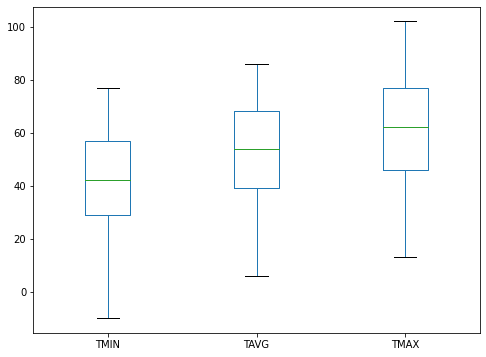

In [42]:
weather.boxplot(column=['TMIN', 'TAVG', 'TMAX'], grid = False, figsize = (8,6));

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [43]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [44]:
weather[['TDIFF']].describe().T

,count,mean,std,min,25%,50%,75%,max
TDIFF,7994.0,19.149237,7.009716,-25.0,14.0,19.0,24.0,48.0


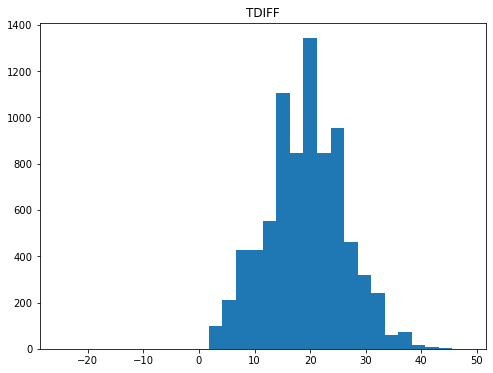

In [45]:
weather.hist(column=['TDIFF'], bins = 30, grid = False, figsize = (8,6));

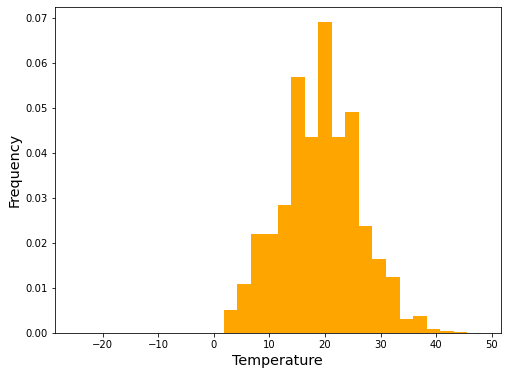

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(8,6))
plt.hist(weather['TDIFF'], density = True, bins=30, color = 'orange')  
plt.ylabel('Frequency', size = 'x-large')
plt.xlabel('Temperature', size = 'x-large');

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

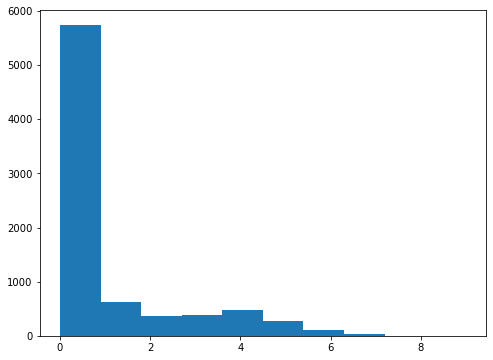

In [48]:
WT = weather.iloc[:, 6:26]
weather["bad_conditions"] = WT.count(axis=1)
weather["bad_conditions"].hist(figsize = (8,6), grid=False)
plt.show()

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [49]:
weather["bad_conditions"].value_counts().sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [50]:
mapping = {0:"good", 1:"bad", 2:"bad",3:"bad",4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9:"worse"}
weather["rating"] = weather["bad_conditions"].map(mapping)

In [51]:
weather["rating"].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [52]:
rating = pd.Series(["good", "bad", "worse"], dtype = "category")
weather["rating"] = rating
weather.loc[weather["bad_conditions"] == 0, "rating"] = rating[0]
weather.loc[(weather["bad_conditions"] > 0) & (weather["bad_conditions"] < 5), "rating"] = rating[1]
weather.loc[weather["bad_conditions"] >= 5, "rating"] = rating[2]

In [53]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0,good
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0,good
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0,good
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0,good


In [54]:
weather['rating'].nunique()

3

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [55]:
cats = ['good','bad','worse']
weather["rating"] = pd.Categorical(weather["rating"], categories=cats, ordered = True)

In [56]:
weather["rating"].dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [57]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
ri = pd.read_csv('police_stop.csv')
ri.head()

,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [58]:
weather_rating = weather[["DATE","rating"]]
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [59]:
weather_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   DATE    8022 non-null   object  
 1   rating  8022 non-null   category
dtypes: category(1), object(1)
memory usage: 70.7+ KB


## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [60]:
ri_weather = pd.merge(ri,weather_rating, how="left", left_on="stop_date", right_on="DATE")
ri_weather = ri_weather.drop_duplicates(subset=['id'])
ri_weather.set_index("stop_datetime", inplace = True)
ri_weather.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02,good
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04,good
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06,good
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,M,1973.0,32.0,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12,good


In [61]:
ri_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480584 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     480584 non-null  object  
 1   stop_date              480584 non-null  object  
 2   stop_time              480584 non-null  object  
 3   location_raw           480584 non-null  object  
 4   county_fips            0 non-null       float64 
 5   fine_grained_location  0 non-null       float64 
 6   police_department      480584 non-null  object  
 7   driver_gender          480584 non-null  object  
 8   driver_age_raw         480583 non-null  float64 
 9   driver_age             478946 non-null  float64 
 10  driver_race_raw        480584 non-null  object  
 11  driver_race            480584 non-null  object  
 12  violation_raw          480584 non-null  object  
 13  violation              480584 non-null  object  

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [62]:
ri_weather["is_arrested"].mean()

0.03454755048024903

In [63]:
ri_weather.groupby("rating")["is_arrested"].mean()

rating
good     0.034560
bad      0.034115
worse    0.025271
Name: is_arrested, dtype: float64

In [64]:
ri_weather.groupby(["violation","rating"])["is_arrested"].mean()

violation            rating
Equipment            good      0.060392
                     bad       0.054348
                     worse     0.083333
Moving violation     good      0.057303
                     bad       0.066667
                     worse     0.030075
Other                good      0.079829
                     bad       0.237288
                     worse     0.069767
Registration/plates  good      0.086129
                     bad       0.017857
                     worse     0.000000
Seat belt            good      0.026836
                     bad       0.000000
                     worse          NaN
Speeding             good      0.013616
                     bad       0.008850
                     worse     0.009464
Name: is_arrested, dtype: float64

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [65]:
arrest_rate = ri_weather.groupby(["rating","violation"])["is_arrested"].mean()
arrest_rate

rating  violation          
good    Equipment              0.060392
        Moving violation       0.057303
        Other                  0.079829
        Registration/plates    0.086129
        Seat belt              0.026836
        Speeding               0.013616
bad     Equipment              0.054348
        Moving violation       0.066667
        Other                  0.237288
        Registration/plates    0.017857
        Seat belt              0.000000
        Speeding               0.008850
worse   Equipment              0.083333
        Moving violation       0.030075
        Other                  0.069767
        Registration/plates    0.000000
        Seat belt                   NaN
        Speeding               0.009464
Name: is_arrested, dtype: float64

In [70]:
arrest_rate.loc[ "bad","Moving violation"]

0.06666666666666667

In [71]:
arrest_rate.loc[:, 'Speeding']

rating
good     0.013616
bad      0.008850
worse    0.009464
Name: is_arrested, dtype: float64

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [72]:
arrest_rate.unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.060392,0.057303,0.079829,0.086129,0.026836,0.013616
bad,0.054348,0.066667,0.237288,0.017857,0.000000,0.008850
worse,0.083333,0.030075,0.069767,0.000000,NaN,0.009464


In [73]:
pd.pivot_table(data= ri_weather, values= 'is_arrested', index = 'rating', columns = 'violation')

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
good,0.060392,0.057303,0.079829,0.086129,0.026836,0.013616
bad,0.054348,0.066667,0.237288,0.017857,0.000000,0.008850
worse,0.083333,0.030075,0.069767,0.000000,NaN,0.009464


In [74]:
pd.pivot_table(data= ri_weather, values= 'is_arrested', index = 'violation', columns = 'rating')

rating,good,bad,worse
violation,,,
Equipment,0.060392,0.054348,0.083333
Moving violation,0.057303,0.066667,0.030075
Other,0.079829,0.237288,0.069767
Registration/plates,0.086129,0.017857,0.000000
Seat belt,0.026836,0.000000,NaN
Speeding,0.013616,0.008850,0.009464
